# XGBoost model
Set to 'Prediction' mode, making predictions from a saved model. 

To change to 'train' mode, go to `xgb_model.config.CFG` and change the value of train from `train=False` to `train=True` 

In [1]:
from xgb_model.main import main
import shap
from xgb_model.visualisation import (initialize_shap_explainer, prepare_shap_explanations, plot_dependence_plots, plot_shap_summary, plot_waterfall_plot, plot_beeswarm_plot, plot_decision_plot, plot_actual_vs_predicted, plot_feature_importance)

Initialise the model, validation set and predictions

In [2]:
results = main()
model, dval, valy, valX, val_predictions = results
explainer, explanation = prepare_shap_explanations(model, valX)
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(valX)
dates = valX.index

Validation MAE: 107.0312922281154
Validation MAE: 107.0312922281154


In [3]:
explainer, shap_values = initialize_shap_explainer(model, valX)

In [4]:
print(type(model)) 

<class 'xgboost.core.Booster'>


In [5]:
print("Shape of valX before plotting:", valX.shape)

Shape of valX before plotting: (327, 189)


# plot of actual TOTALDEMAND values vs forecast values

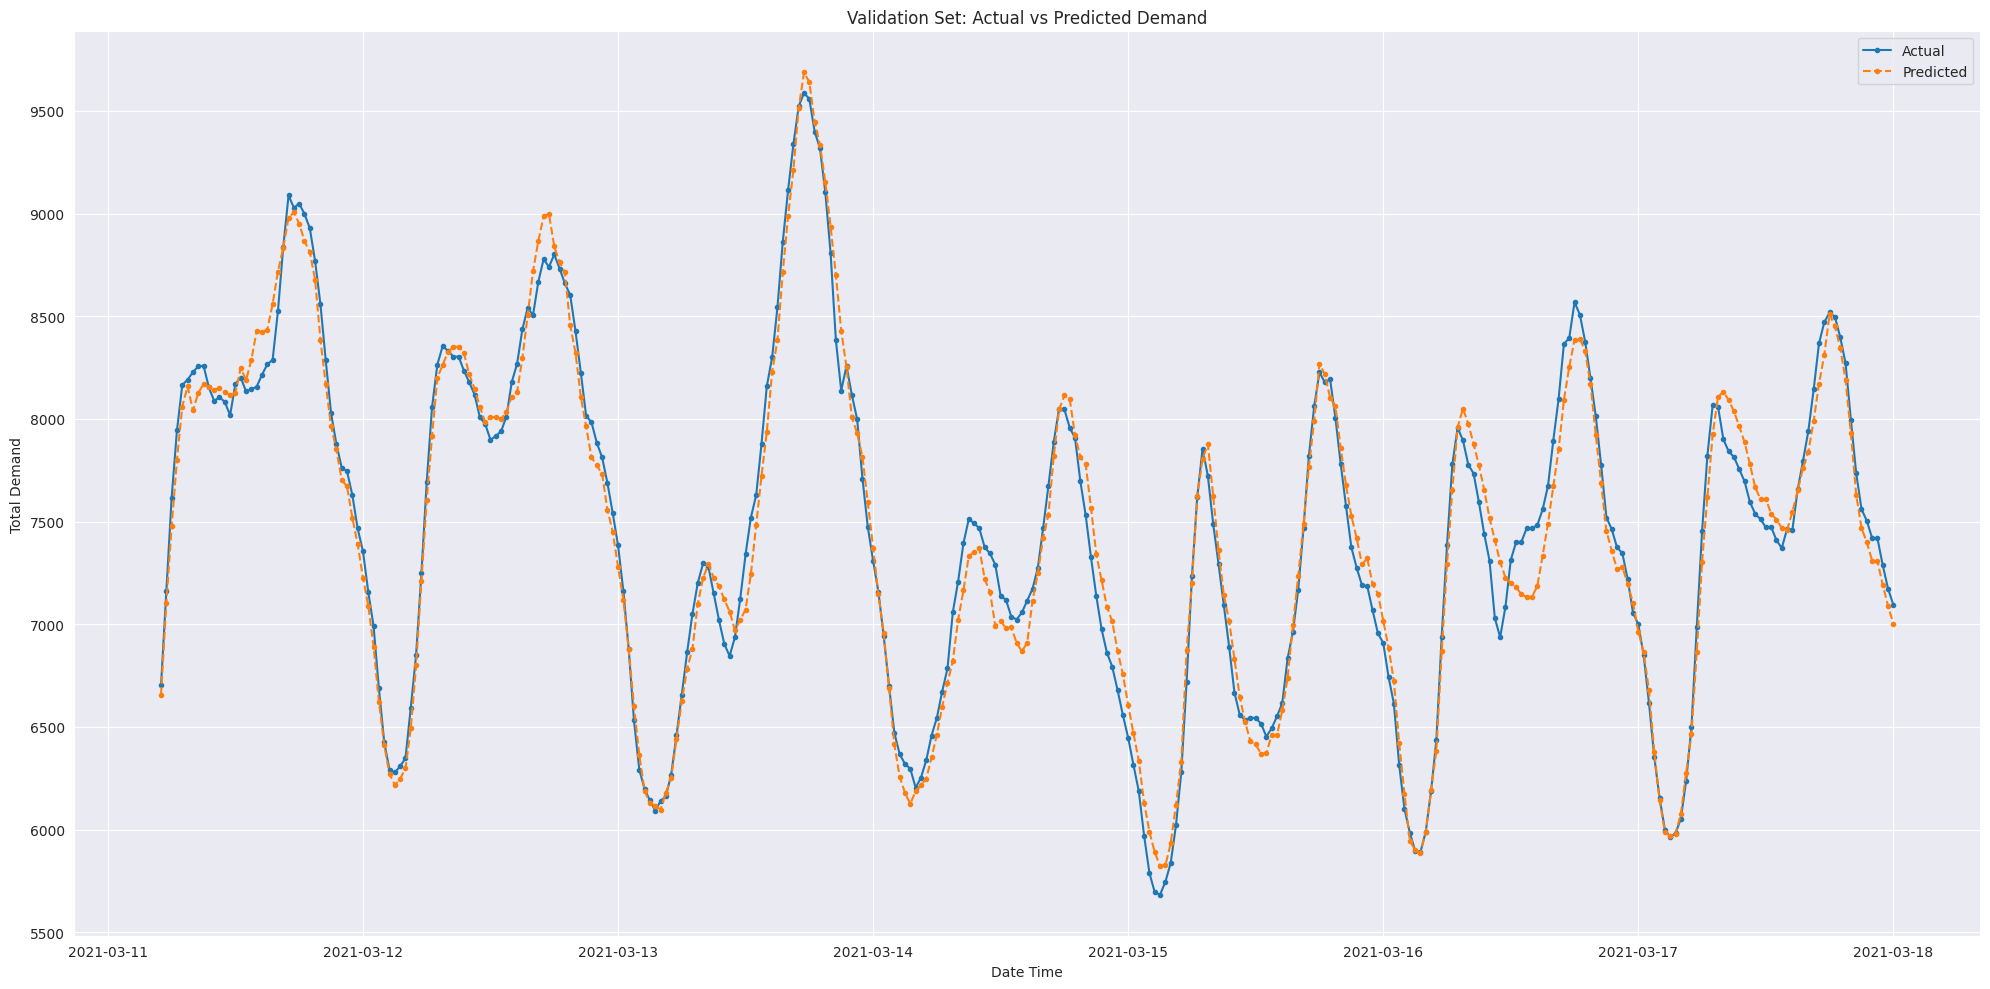

In [6]:
dates = valX.index
plot_actual_vs_predicted(
    dates,
    valy,
    val_predictions,
    'validation_actual_vs_predicted.png'
)

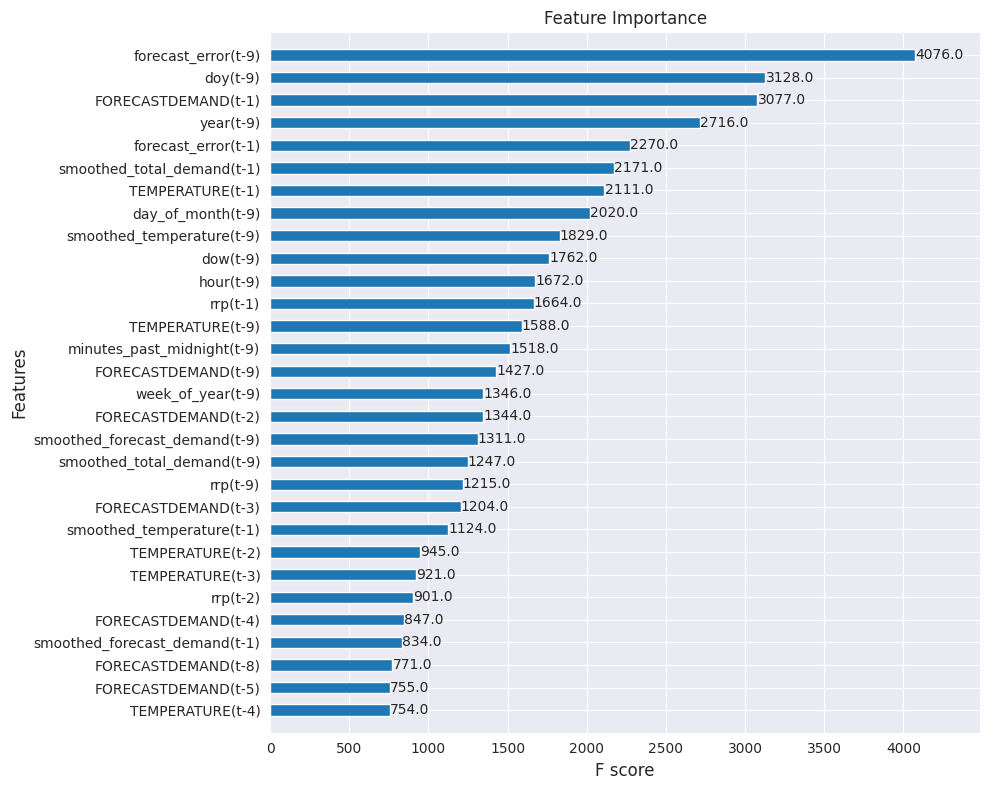

In [7]:
plot_feature_importance(
    model,
    'Feature Importance.png'
)

# shap summary plot

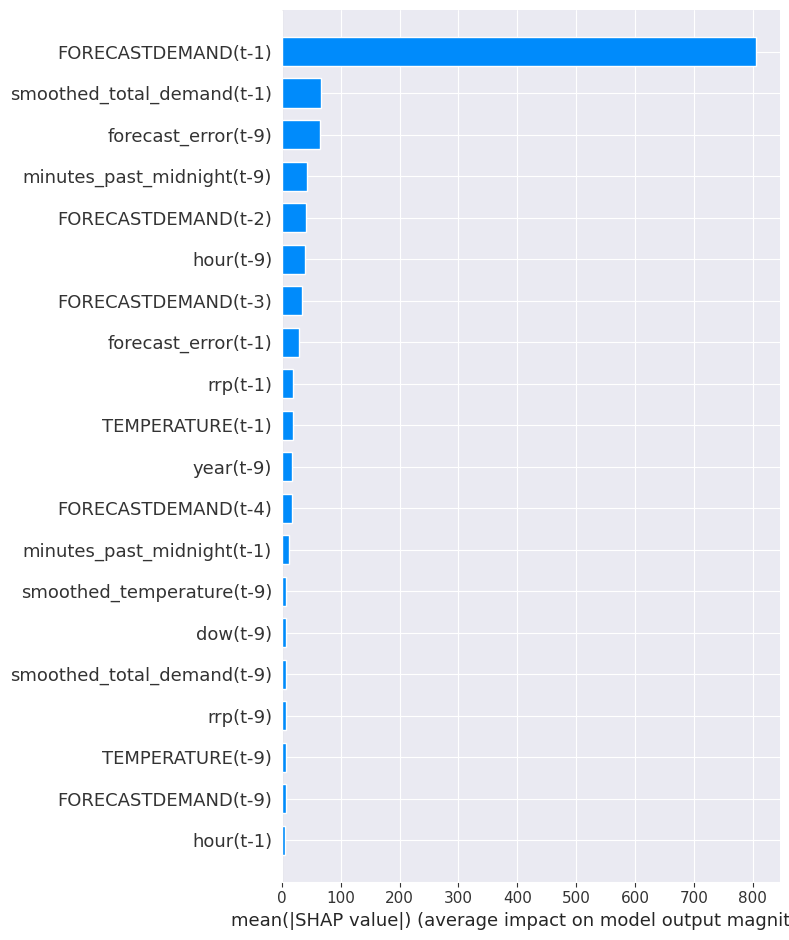

In [8]:
plot_shap_summary(
    model,
    valX,
    'SHAP summary.png'
)

# Dependence plots for feature 1

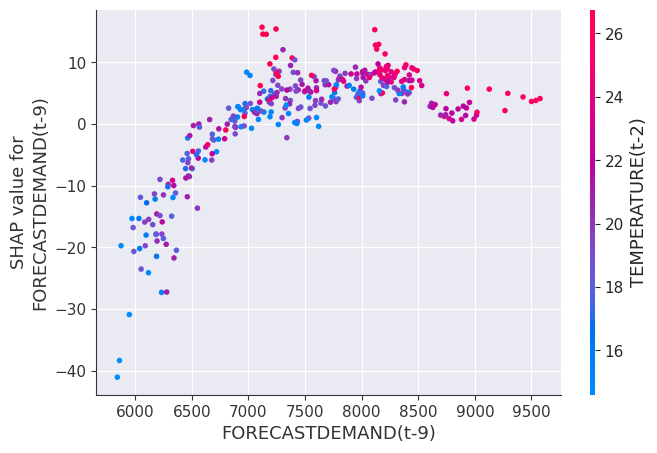

<Figure size 640x480 with 0 Axes>

In [9]:
plot_dependence_plots(
    explainer,
    valX,
    0,
    'dependence_plot_feature_0.png'
)

# Dependence plots for feature 2

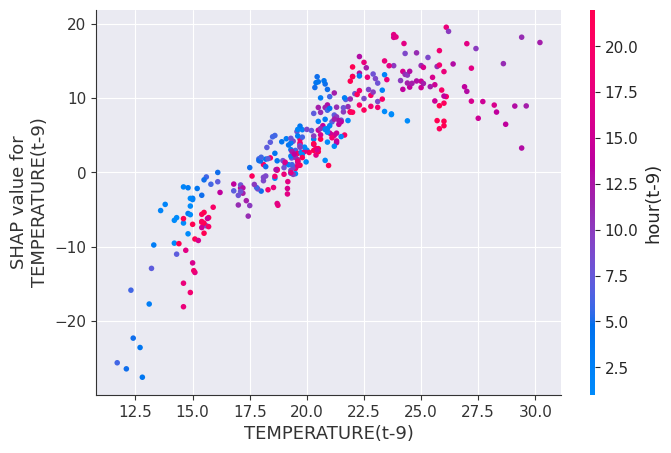

<Figure size 640x480 with 0 Axes>

In [10]:
plot_dependence_plots(
    explainer,
    valX,
    1,
    'dependence_plot_feature_1.png'
)

# Decision Plot

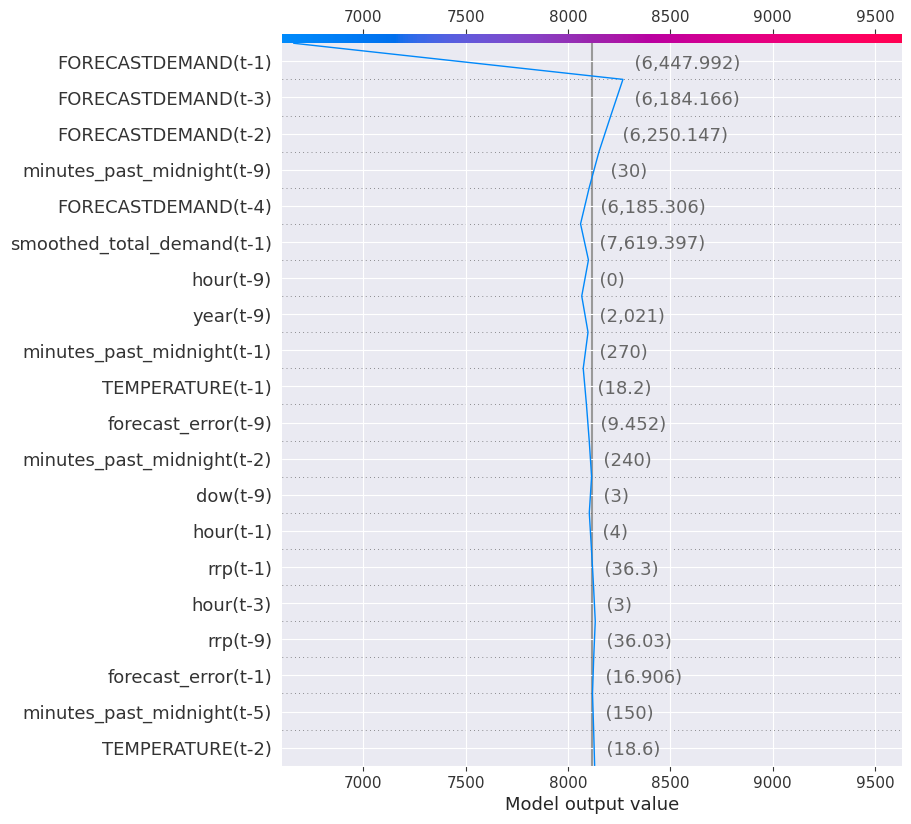

<Figure size 640x480 with 0 Axes>

In [11]:
plot_decision_plot(
    explainer,
    valX,
    explanation.values,
    'decision plot.png'
)

# Waterfall Plot

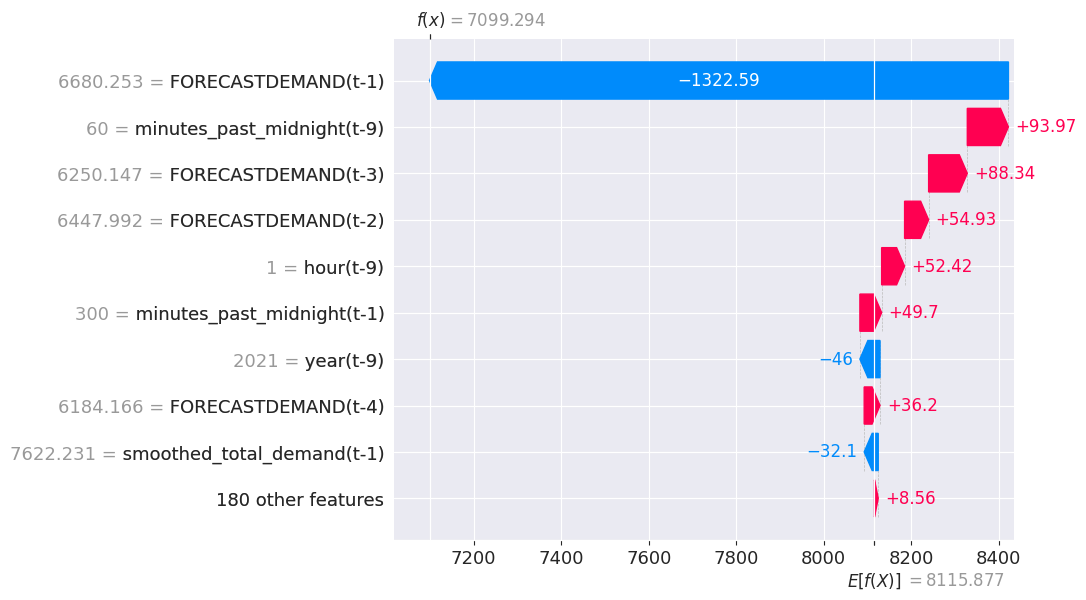

<Figure size 640x480 with 0 Axes>

In [12]:
plot_waterfall_plot(
    explanation[1],
    'Waterfall Plot.png'
)

# Bee Swarm Plot

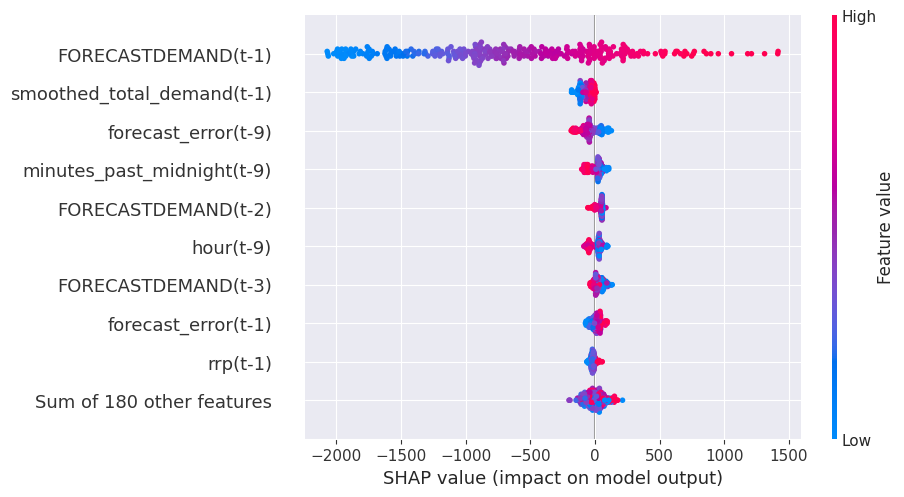

<Figure size 640x480 with 0 Axes>

In [13]:
plot_beeswarm_plot(
    explanation,
    image_name='Bee Swarm Plot.png'
)